In [1]:
import matplotlib.pyplot as plt

In [6]:
def read_data(file_path):
    latitudes = []
    longitudes = []
    rad0_values = []
    
    with open(file_path, 'r') as file:
        for line in file:
            lat, lon, rad0 = map(float, line.split())
            latitudes.append(lat)
            longitudes.append(lon)
            rad0_values.append(rad0)
    
    return latitudes, longitudes, rad0_values

# File path containing the data
file_path_01012015 = "/home/hzin/earthAI/logs/rad500_140101.txt"  # Change this to your file path

# Read data from the file
latitudes, longitudes, rad500_values = read_data(file_path_01012015)

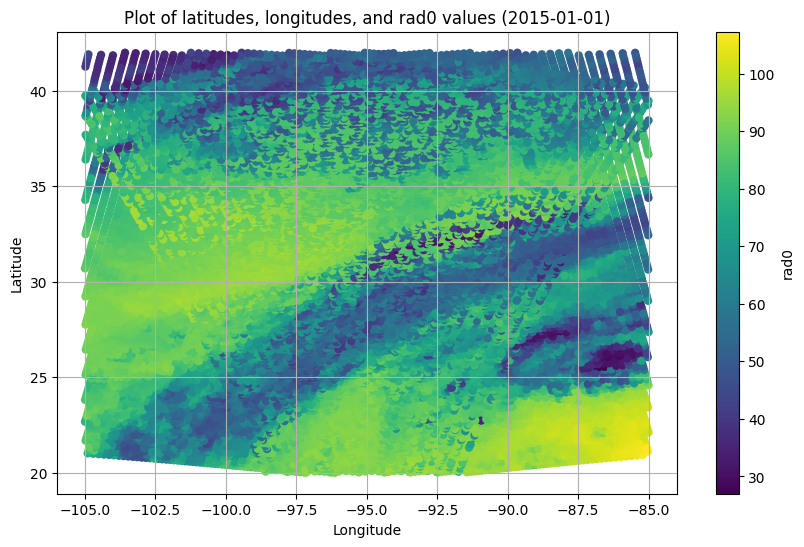

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=rad500_values, cmap='viridis', marker='o', edgecolors='none')
plt.colorbar(label='rad0')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of latitudes, longitudes, and rad0 values (2015-01-01)')
plt.grid(True)
plt.show()

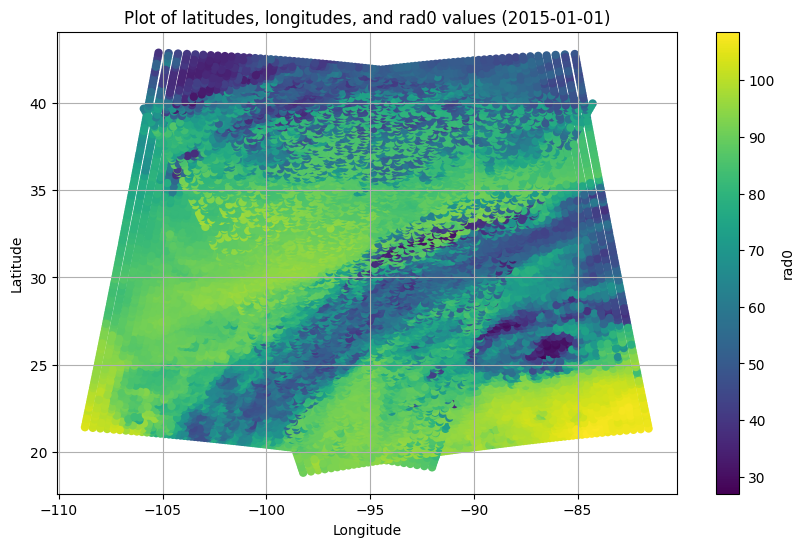

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(longitudes1, latitudes1, c=rad0_values1, cmap='viridis', marker='o', edgecolors='none')
plt.colorbar(label='rad0')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of latitudes, longitudes, and rad0 values (2015-01-01)')
plt.grid(True)
plt.show()

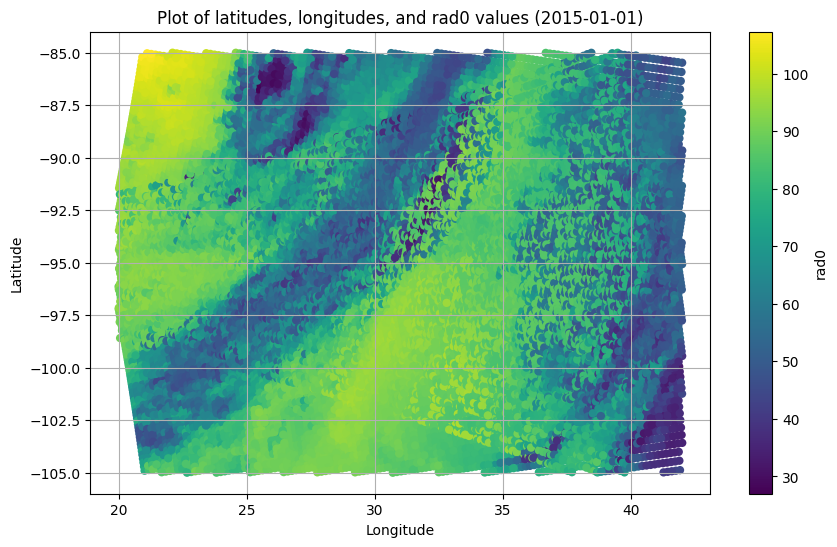

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, longitudes, c=rad500_values, cmap='viridis', marker='o', edgecolors='none')
plt.colorbar(label='rad0')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of latitudes, longitudes, and rad0 values (2015-01-01)')
plt.grid(True)
plt.show()

Interpolation

In [8]:
from scipy.interpolate import griddata
import numpy as np

# Define the grid boundaries and resolution
min_lat = min(latitudes)
max_lat = max(latitudes)
min_lon = min(longitudes)
max_lon = max(longitudes)
resolution = 0.05  # Adjust as needed

# Generate grid points
grid_lat, grid_lon = np.meshgrid(
    np.arange(min_lat, max_lat, resolution),
    np.arange(min_lon, max_lon, resolution)
)

# Perform interpolation using inverse distance weighting
grid_rad500 = griddata(
    (latitudes, longitudes),
    rad500_values,
    (grid_lat, grid_lon),
    method='nearest'
)

print(grid_rad500)


[[ 77.47393036  77.47393036  77.47393036 ...  44.01073837  44.01073837
   44.01073837]
 [ 77.47393036  77.47393036  77.47393036 ...  44.01073837  44.01073837
   44.01073837]
 [ 75.46065521  75.46065521  75.46065521 ...  44.01073837  44.01073837
   44.01073837]
 ...
 [106.81646729 106.81646729 106.81646729 ...  50.716362    50.716362
   50.716362  ]
 [106.81646729 106.81646729 106.81646729 ...  50.716362    50.716362
   50.716362  ]
 [106.81646729 106.81646729 106.81646729 ...  50.716362    50.716362
   50.716362  ]]


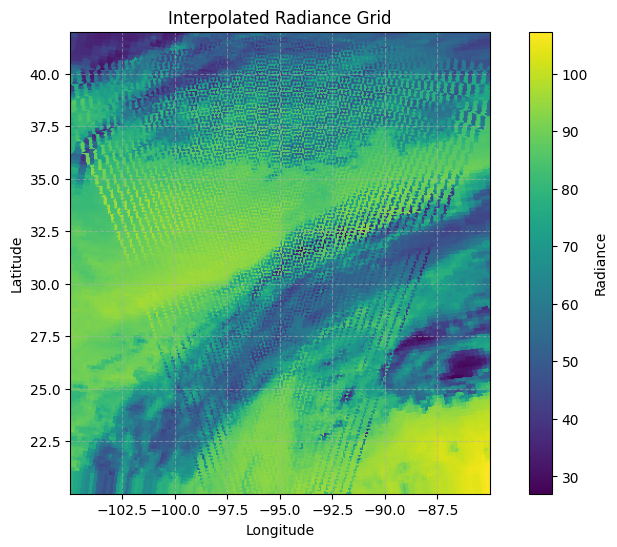

In [25]:
# Plot the grid
plt.figure(figsize=(10, 6))
plt.imshow(grid_rad500.T, extent=(min_lon, max_lon, min_lat, max_lat), origin='lower')
plt.colorbar(label='Radiance')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Interpolated Radiance Grid')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

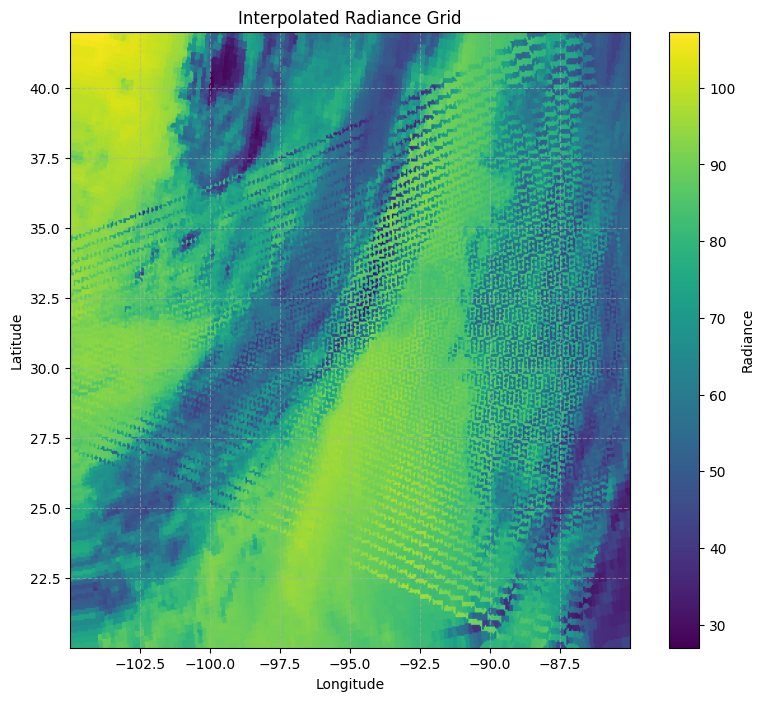

In [14]:
# Plot the grid
plt.figure(figsize=(10, 8))
plt.imshow(grid_rad500, extent=(min_lon, max_lon, min_lat, max_lat), origin='lower')
plt.colorbar(label='Radiance')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Interpolated Radiance Grid')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

Save to tif

In [10]:
from PIL import Image
img = Image.fromarray(grid_rad500)
img.save('/home/hzin/earthAI/logs/140101.tif')